### Topic:Employee Turnover Prediction in a company to prevent lack of workers

### import libraries

In [1]:
### import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report


### Stp 1: Perform Data Quality Checks

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


### Stp 2: Exploratory Data Analysis 

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
# 1. Correlation Heatmap

In [7]:
df_corr = df[['satisfaction_level', 'last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]
df_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


<Axes: >

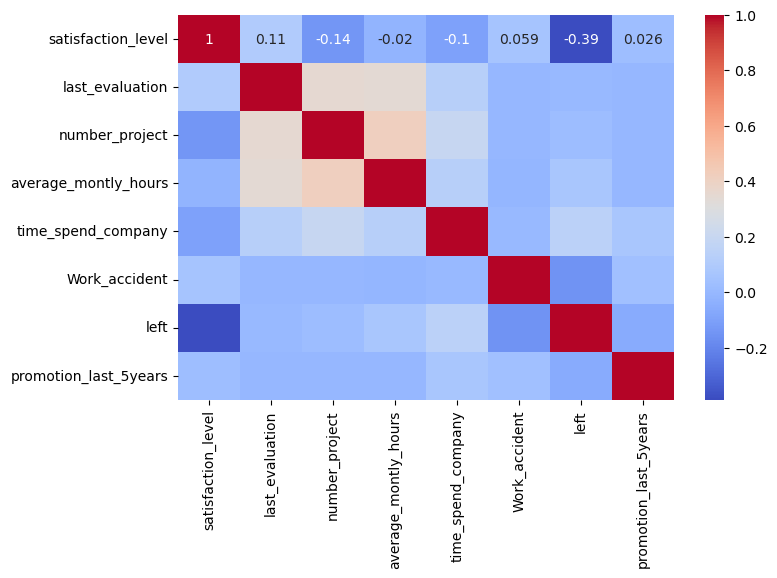

In [8]:
plt.figure(figsize=(8,5))
sns.heatmap(df_corr.corr(),annot=True,cmap='coolwarm')

In [9]:
#Draw the distribution plot

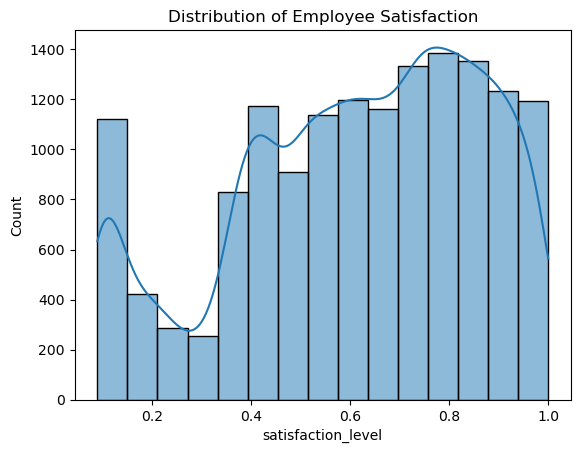

In [10]:
sns.histplot(df['satisfaction_level'], kde=True,bins=15)
plt.title('Distribution of Employee Satisfaction')
plt.show()

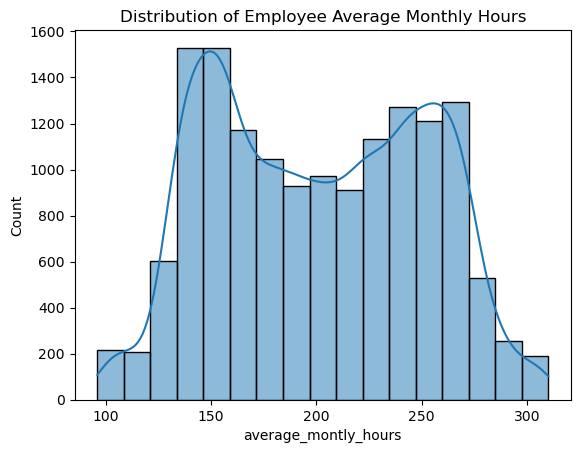

In [11]:
sns.histplot(df['average_montly_hours'], kde=True,bins=17)
plt.title('Distribution of Employee Average Monthly Hours')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

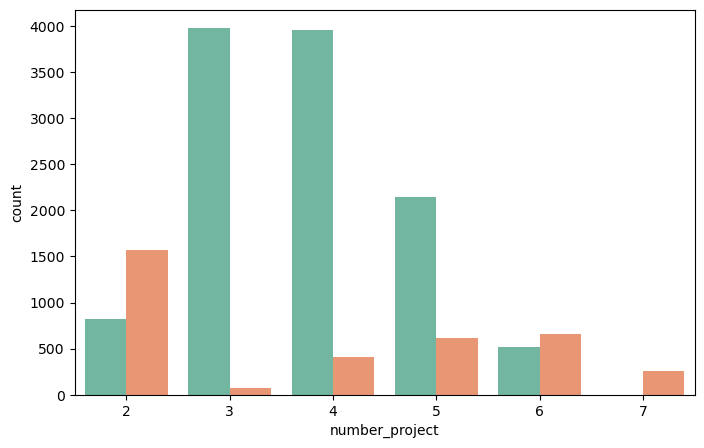

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.countplot(x='number_project', hue='left', data=df, palette='Set2')
plt.title('Employee Project Count by Turnover')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.legend(title='Left', loc='upper right', labels=['Stayed', 'Left'])
plt.show()

# Stp 3: Clustering of Employees

In [ ]:
from sklearn.cluster import KMeans
df_left = df[df['left'] == 1]
X = df_left[['satisfaction_level', 'last_evaluation']]
X.isnull().sum()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
df_left['cluster'] = kmeans.fit_predict(X)

In [ ]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=df_left, palette='viridis', s=100)
plt.title('K-means Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='Cluster')
plt.show()

Step 4: Handling Class Imbalance using SMOTE

In [ ]:
# 1. Data Preprocessing

In [ ]:
df = pd.get_dummies(df, columns=['sales', 'salary'], drop_first=True)
df.info()

In [ ]:
#2. Perform Train Test split

In [ ]:
X = df.drop('left',axis=1)
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [ ]:
sm = SMOTE(random_state=123)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train)

In [ ]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train the models and make predictions
predictions = {}
probs = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_test)
    probs[model_name] = model.predict_proba(X_test)[:, 1]

# Stp6:Find the ROC/AUC for each model and plot the ROC curve.

In [ ]:
plt.figure(figsize=(5, 4))

for model_name in models:
    fpr, tpr, _ = roc_curve(y_test, probs[model_name])
    auc = roc_auc_score(y_test, probs[model_name])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
#Find the confusion matrix for each of the models.

In [ ]:
# Confusion matrices
for model_name in models:
    cm = confusion_matrix(y_test, predictions[model_name])
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
# Print classification reports and evaluate models
for model_name in models:
    print(f'Classification Report for {model_name}:\n')
    print(classification_report(y_test, predictions[model_name]))
    roc_auc = roc_auc_score(y_test, probs[model_name])
    print(f'ROC AUC for {model_name}: {roc_auc:.2f}\n')

# stp 1. Predict Turnover Probability

In [ ]:
# Print classification reports and evaluate models
for model_name in models:
    print(f'Classification Report for {model_name}:\n')
    print(classification_report(y_test, predictions[model_name]))
    roc_auc = roc_auc_score(y_test, probs[model_name])
    print(f'ROC AUC for {model_name}: {roc_auc:.2f}\n')

In [ ]:
best_model = models['Random Forest']  # Assuming Random Forest is the best model
y_test_prob = best_model.predict_proba(X_test)[:, 1]

df_test = X_test.copy()
df_test['left_prob'] = y_test_prob

In [ ]:
def retention_strategy(prob):
    if prob < 0.20:
        return 'Safe Zone (Green)'
    elif prob < 0.60:
        return 'Low-Risk Zone (Yellow)'
    elif prob < 0.90:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

df_test['retention_zone'] = df_test['left_prob'].apply(retention_strategy)

In [ ]:
# Count occurrences of each retention zone
zone_counts = df_test['retention_zone'].value_counts()

In [ ]:
# Plotting
plt.figure(figsize=(5, 4))
zone_counts.plot(kind='bar', color=['green', 'red', 'orange', 'yellow'])
plt.title('Retention Strategy Distribution')
plt.xlabel('Retention Zones')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()